In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [3]:
file_path = "D:/Desktop/Data_folder/data/togo-dapaong_qc.csv"

## Loading The Data


In [4]:
togo_df = pd.read_csv(file_path)

## Data Cleaning

<Axes: >

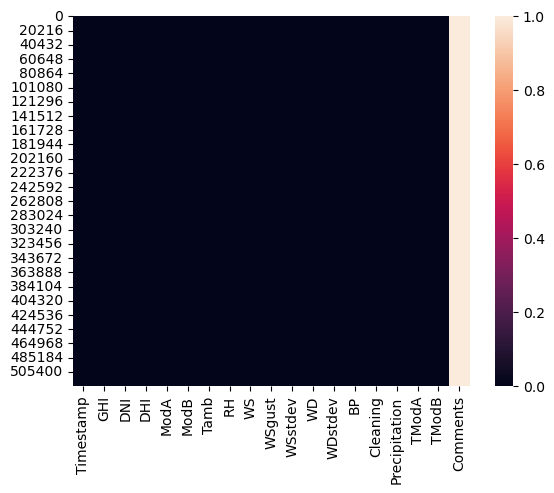

In [5]:
sns.heatmap(togo_df.isnull())

As we can see from the above heatmap the "comments" column contains null values in all rows so there is no harm in dropping the column

In [32]:
togo_df = togo_df.drop(columns=['Comments'])

 Describe the data type of the column

## Descriptive Statistics

In [34]:
togo_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour,Month
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,11.500000,6.526027
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,0.000000,1.000000
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,5.750000,4.000000
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,11.500000,7.000000
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,17.250000,10.000000
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,23.000000,12.000000
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,6.922193,3.447855


classify the columns in to three different lists

In [35]:
catagory_col = ["Timestamp","Cleaning"]
numeric_col = [col for col in togo_df.columns if col not in catagory_col ]
target_col = ["ModA","ModB"]

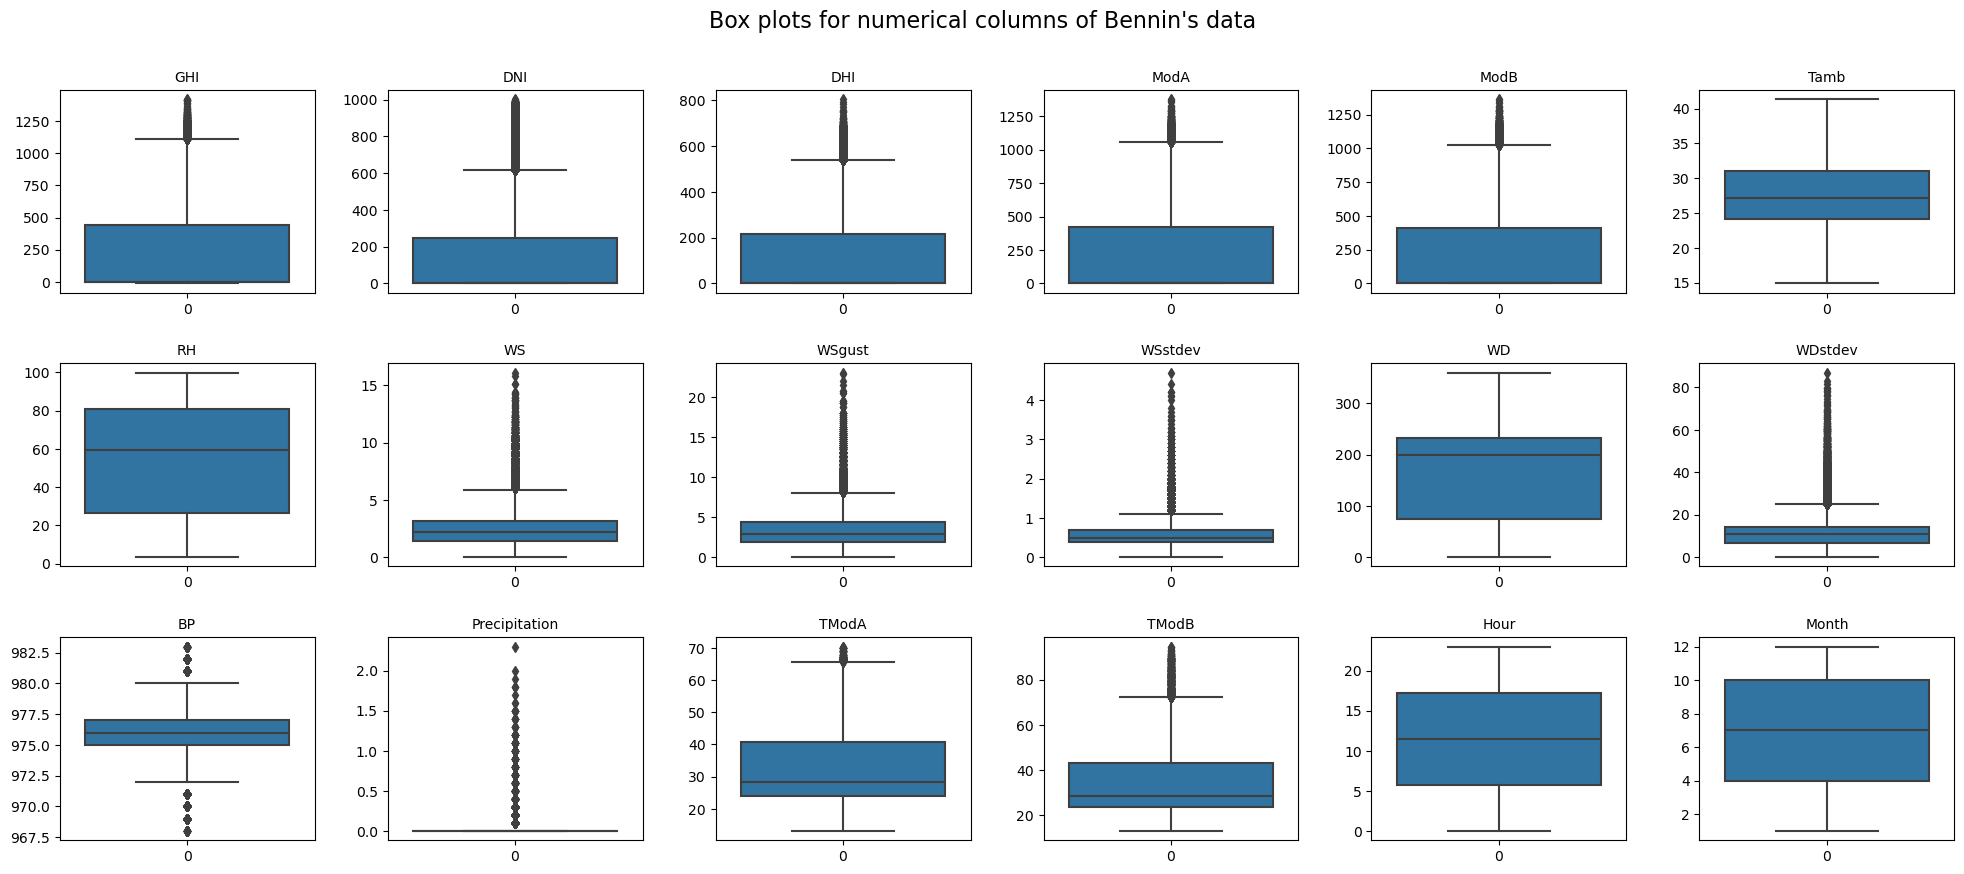

In [36]:
# Define the maximum number of columns per row
MAX_COLUMNS = 6

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(numeric_col) / MAX_COLUMNS)

# Create a figure with a larger size
fig = plt.figure(figsize=(20, 3 * num_rows))
fig.suptitle("Box plots for numerical columns of Bennin's data", fontsize=16)

# Loop through each column and create a subplot
for idx, col_name in enumerate(numeric_col):
    if col_name in togo_df.columns:
        # Calculate row and column for the subplot
        row = idx // MAX_COLUMNS
        col = idx % MAX_COLUMNS
        
        # Create a subplot for each box plot
        ax = plt.subplot(num_rows, MAX_COLUMNS, idx + 1)  # (num_rows, MAX_COLUMNS, position)
        
        # Plot the boxplot for the column
        sns.boxplot(data=togo_df[col_name].astype(float), ax=ax, orient='v')
        
        # Set the title for each subplot (optional)
        ax.set_title(f'{col_name}', fontsize=10)
        
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Adjust the layout to ensure there is no overlap
plt.tight_layout(pad=2)

# Show the figure with all the box plots
plt.show()

Based on the box plots, it is evident that the distributions of our variables do not follow a normal pattern. In fact, most of the variables exhibit a right-skewed distribution. Additionally, all variables contain outliers that require attention and further handling.

## Removing Outliers

In [37]:
lower_limit = 1.5
upper_limit = 1.5

# Calculate the number of rows before removing outliers
initial_data_points = togo_df[numeric_col].shape[0]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = togo_df[numeric_col].quantile(0.25)
Q3 = togo_df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Create masks for filtering out outliers based on IQR
lower_bound = Q1 - lower_limit * IQR
upper_bound = Q3 + upper_limit * IQR

# Create a mask to filter out outliers
outlier_mask = (togo_df[numeric_col] >= lower_bound) & (togo_df[numeric_col] <= upper_bound)

# Apply the mask to the dataframe (without .all(axis=1))
togo_df_filtered = togo_df[outlier_mask]

# Calculate the percentage of data removed
togo_removed = 100 - ((togo_df_filtered.shape[0] / initial_data_points) * 100)

# Print the percentage of data removed
print(f"Removed {togo_removed:.2f}% of data from togo dataset")


Removed 0.00% of data from togo dataset


In [38]:
togo_df_filtered.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour,Month
count,0,524297.000000,475014.000000,517695.000000,524363.000000,524063.000000,525600.000000,525600.000000,516892.000000,518223.000000,510931.000000,525600.000000,518679.000000,506372.000000,0.0,522262.0,525463.000000,525027.000000,525600.000000,525600.000000
mean,NaT,228.220442,89.152911,109.250293,224.050929,217.028178,27.751788,55.013160,2.291463,3.140772,0.534055,161.741845,10.294459,976.025189,NaN,0.0,32.435356,33.493762,11.500000,6.526027
min,NaT,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,972.000000,NaN,0.0,13.100000,13.100000,0.000000,1.000000
25%,NaT,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,NaN,0.0,23.900000,23.600000,5.750000,4.000000
50%,NaT,1.700000,0.000000,1.200000,4.000000,3.800000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.700000,976.000000,NaN,0.0,28.400000,28.400000,11.500000,7.000000
75%,NaT,438.000000,70.300000,206.200000,418.600000,406.100000,31.100000,80.800000,3.200000,4.100000,0.700000,233.500000,13.900000,977.000000,NaN,0.0,40.600000,43.000000,17.250000,10.000000
max,NaT,1109.000000,616.000000,539.200000,1056.200000,1027.000000,41.400000,99.800000,5.900000,8.100000,1.100000,360.000000,24.900000,980.000000,NaN,0.0,65.600000,72.100000,23.000000,12.000000
std,NaN,319.499656,170.122987,146.318356,314.767093,304.771240,4.758023,28.778732,1.341715,1.730585,0.228857,91.877217,5.433949,1.931254,NaN,0.0,10.985465,12.686278,6.922193,3.447855


The data reveals that the "GHI, column contain both negative and positive values. These negative readings could arise from various factors, but to pinpoint the cause, we need to analyze the times at which these negative values occur. If the negative readings are primarily recorded during nighttime, it could indicate that the sensors are emitting stored heat after a full day of exposure to sunlight. This phenomenon suggests a calibration issue with the sensors. In such cases, it would be appropriate to correct these values to zero, as solar irradiance should theoretically be zero during the night. This adjustment would help maintain the integrity of the dataset and provide a more accurate representation of solar irradiance patterns.

In [39]:
# breakdown the timestamp into hours of the day and also month of the year
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df['Hour'] = togo_df['Timestamp'].dt.hour
togo_df['Month'] = togo_df['Timestamp'].dt.month

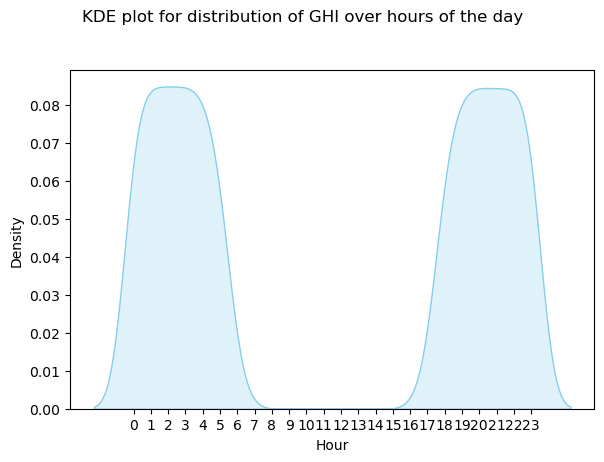

In [24]:
# Filter data points that have negative GHI
ghi_df = togo_df[(togo_df['GHI'] < 0)]

# Set up the title for the plot
plt.suptitle("KDE plot for distribution of GHI over hours of the day")

# Create a KDE plot for the distribution of GHI over the 'Hour' column
sns.kdeplot(data=ghi_df, x='Hour', fill=True, color='skyblue')

# Customize the x-axis to increment by 1
plt.xticks(ticks=range(togo_df['Hour'].min(), togo_df['Hour'].max() + 1, 1))

# Adjust spacing between subplots
plt.tight_layout(pad=2)

plt.show()


From the histogram above, we observe that negative readings predominantly occur during two distinct periods:

From 12:00 AM (midnight) to 7:00 AM
From 6:00 PM to 11:00 PM
These times align with nighttime hours when solar irradiance should naturally be zero. This indicates that the negative readings likely result from residual heat being emitted by the sensors after prolonged daytime exposure, highlighting a potential calibration issue. To address this, the most logical solution is to replace all negative values with zeros, as this accurately reflects the expected irradiance during nighttime hours.

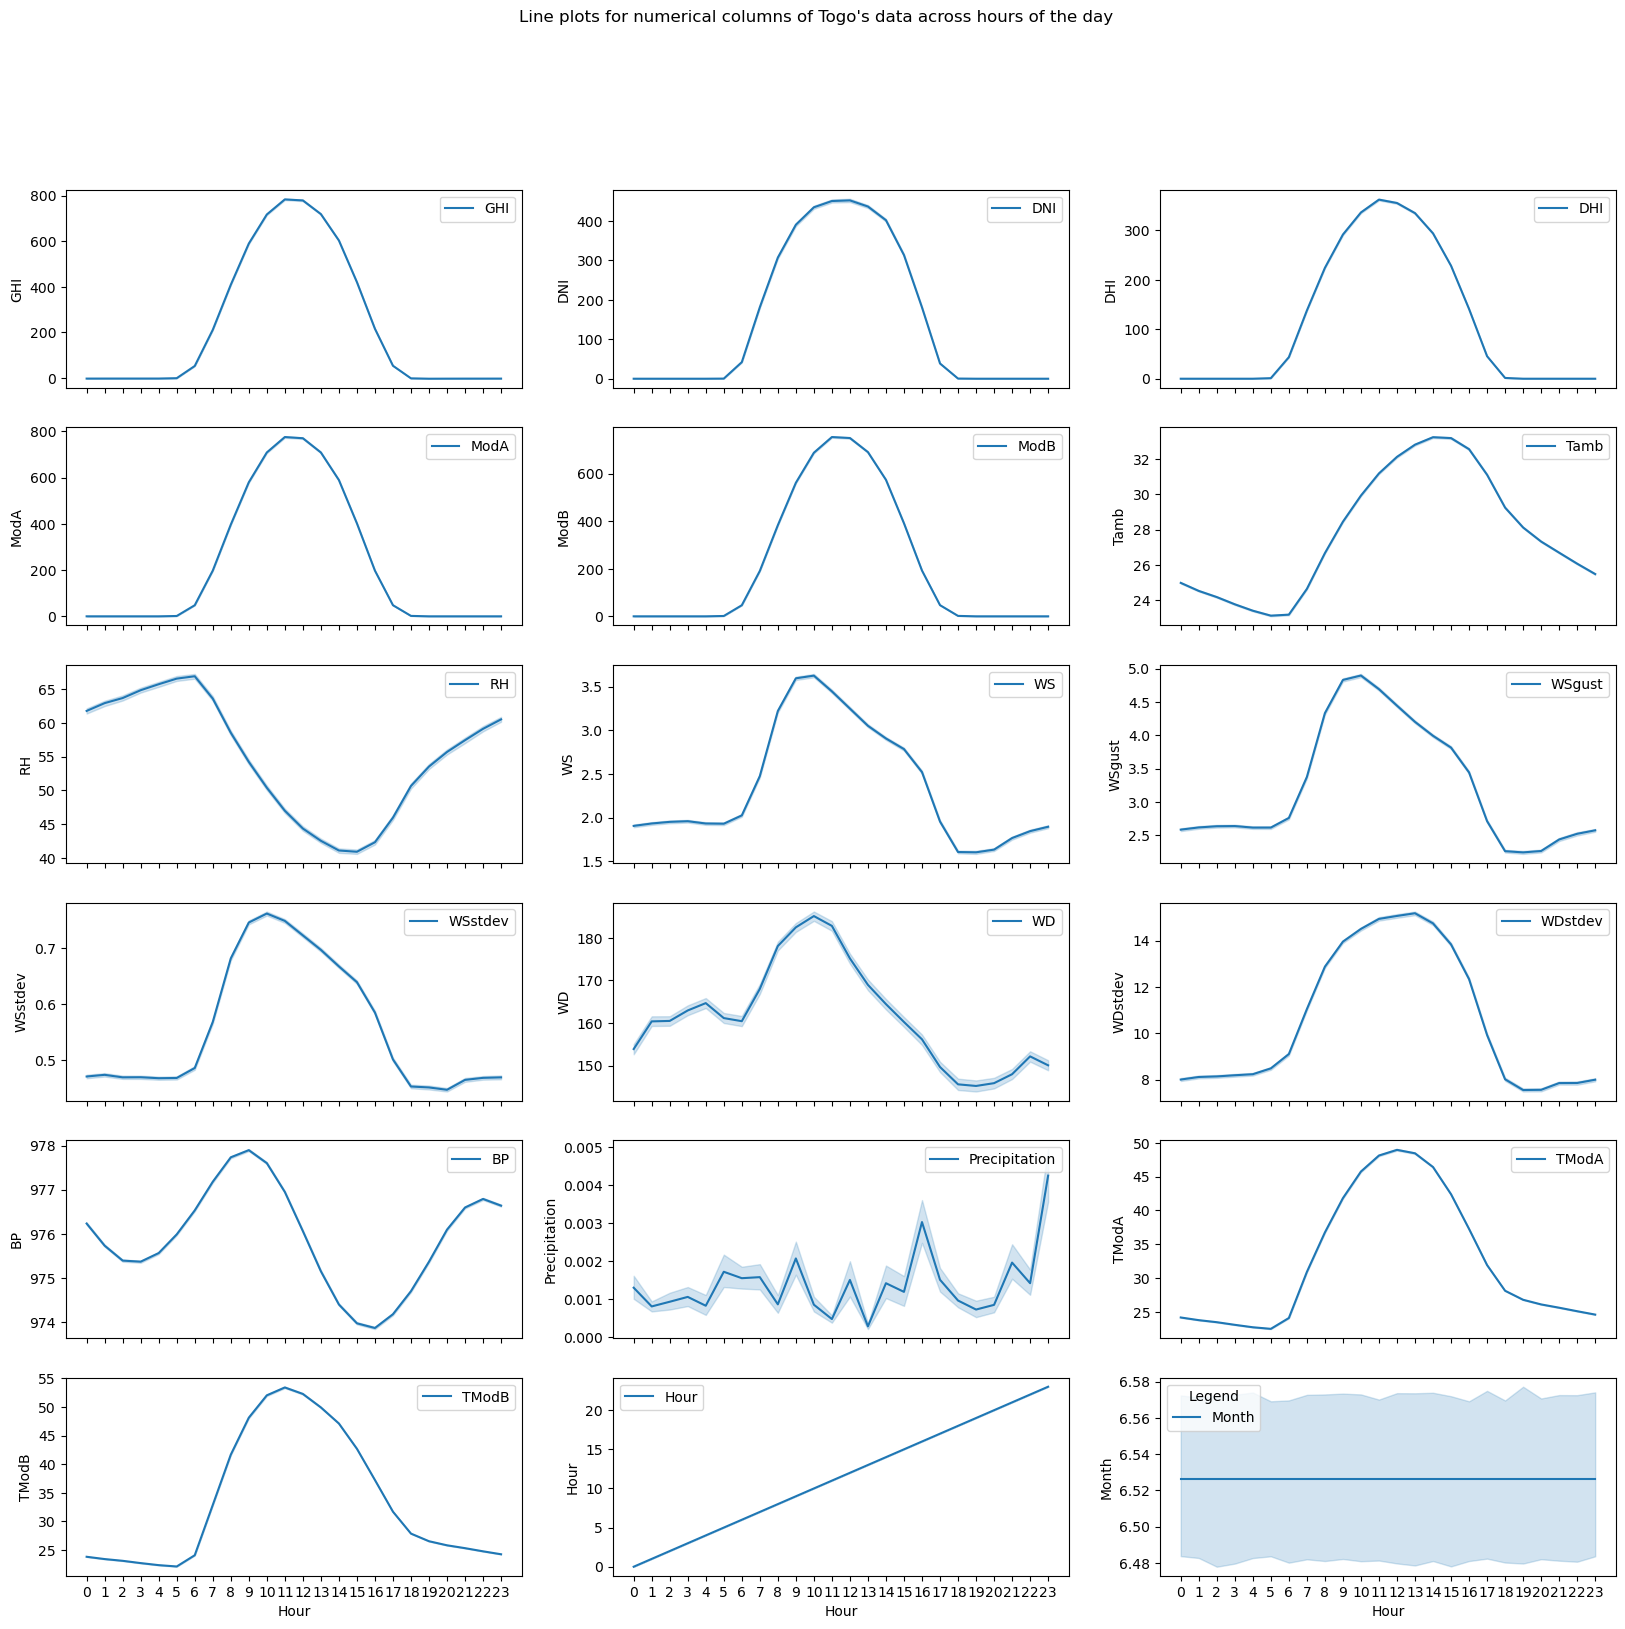

In [45]:


# Max number of columns per subplot
MAX_COLUMNS = 3

# Calculate the number of rows
num_rows = math.ceil(len(numeric_col) / MAX_COLUMNS)

# Subplot for line plots
fig, axes = plt.subplots(ncols=MAX_COLUMNS, nrows=num_rows, sharex=True, figsize=(20, 3 * num_rows), squeeze=True)
fig.suptitle("Line plots for numerical columns of Togo's data across hours of the day")

axes = axes.flatten()

# Loop through the numerical columns
for idx, col_name in enumerate(numeric_col):
    # Check if col_name exists in the DataFrame
    if col_name in togo_df.columns:
        sns.lineplot(data=togo_df, x='Hour', y=col_name, label=col_name, ax=axes[idx])
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Customize the x-axis to increment by 1
plt.xticks(ticks=range(togo_df['Hour'].min(), togo_df['Hour'].max() + 1, 1))

# Show legend
plt.legend(loc='upper left', fontsize='medium', title='Legend')

# Show the plot
plt.show()


The line plots above reveal that many features, including `GHI`, `DNI`, `DHI`, `ModA`, `ModB`, and `WDstdev`, exhibit a consistent daily pattern. These patterns typically align with natural solar and environmental cycles. Specifically:

- **Flat Periods (12 AM - 7 AM and 6 PM - 11 PM):** During these hours, these features show minimal or no activity, aligning with nighttime when solar irradiance and related metrics are expected to be near zero.

- **Rise and Peak (7 AM - 12 PM):** From sunrise, these metrics gradually increase, reaching their peak around midday (12 PM). This aligns with the sun being at its highest point in the sky, maximizing irradiance and related parameters.

- **Decline (12 PM - 6 PM):** Post midday, these metrics gradually decrease as the sun sets, returning to minimal levels by evening.

This consistent pattern reflects the daily solar cycle's influence on these environmental metrics. To explore similar trends across a larger timescale, such as months, let us analyze how these metrics behave over the months of the year to identify seasonal variations or trends.

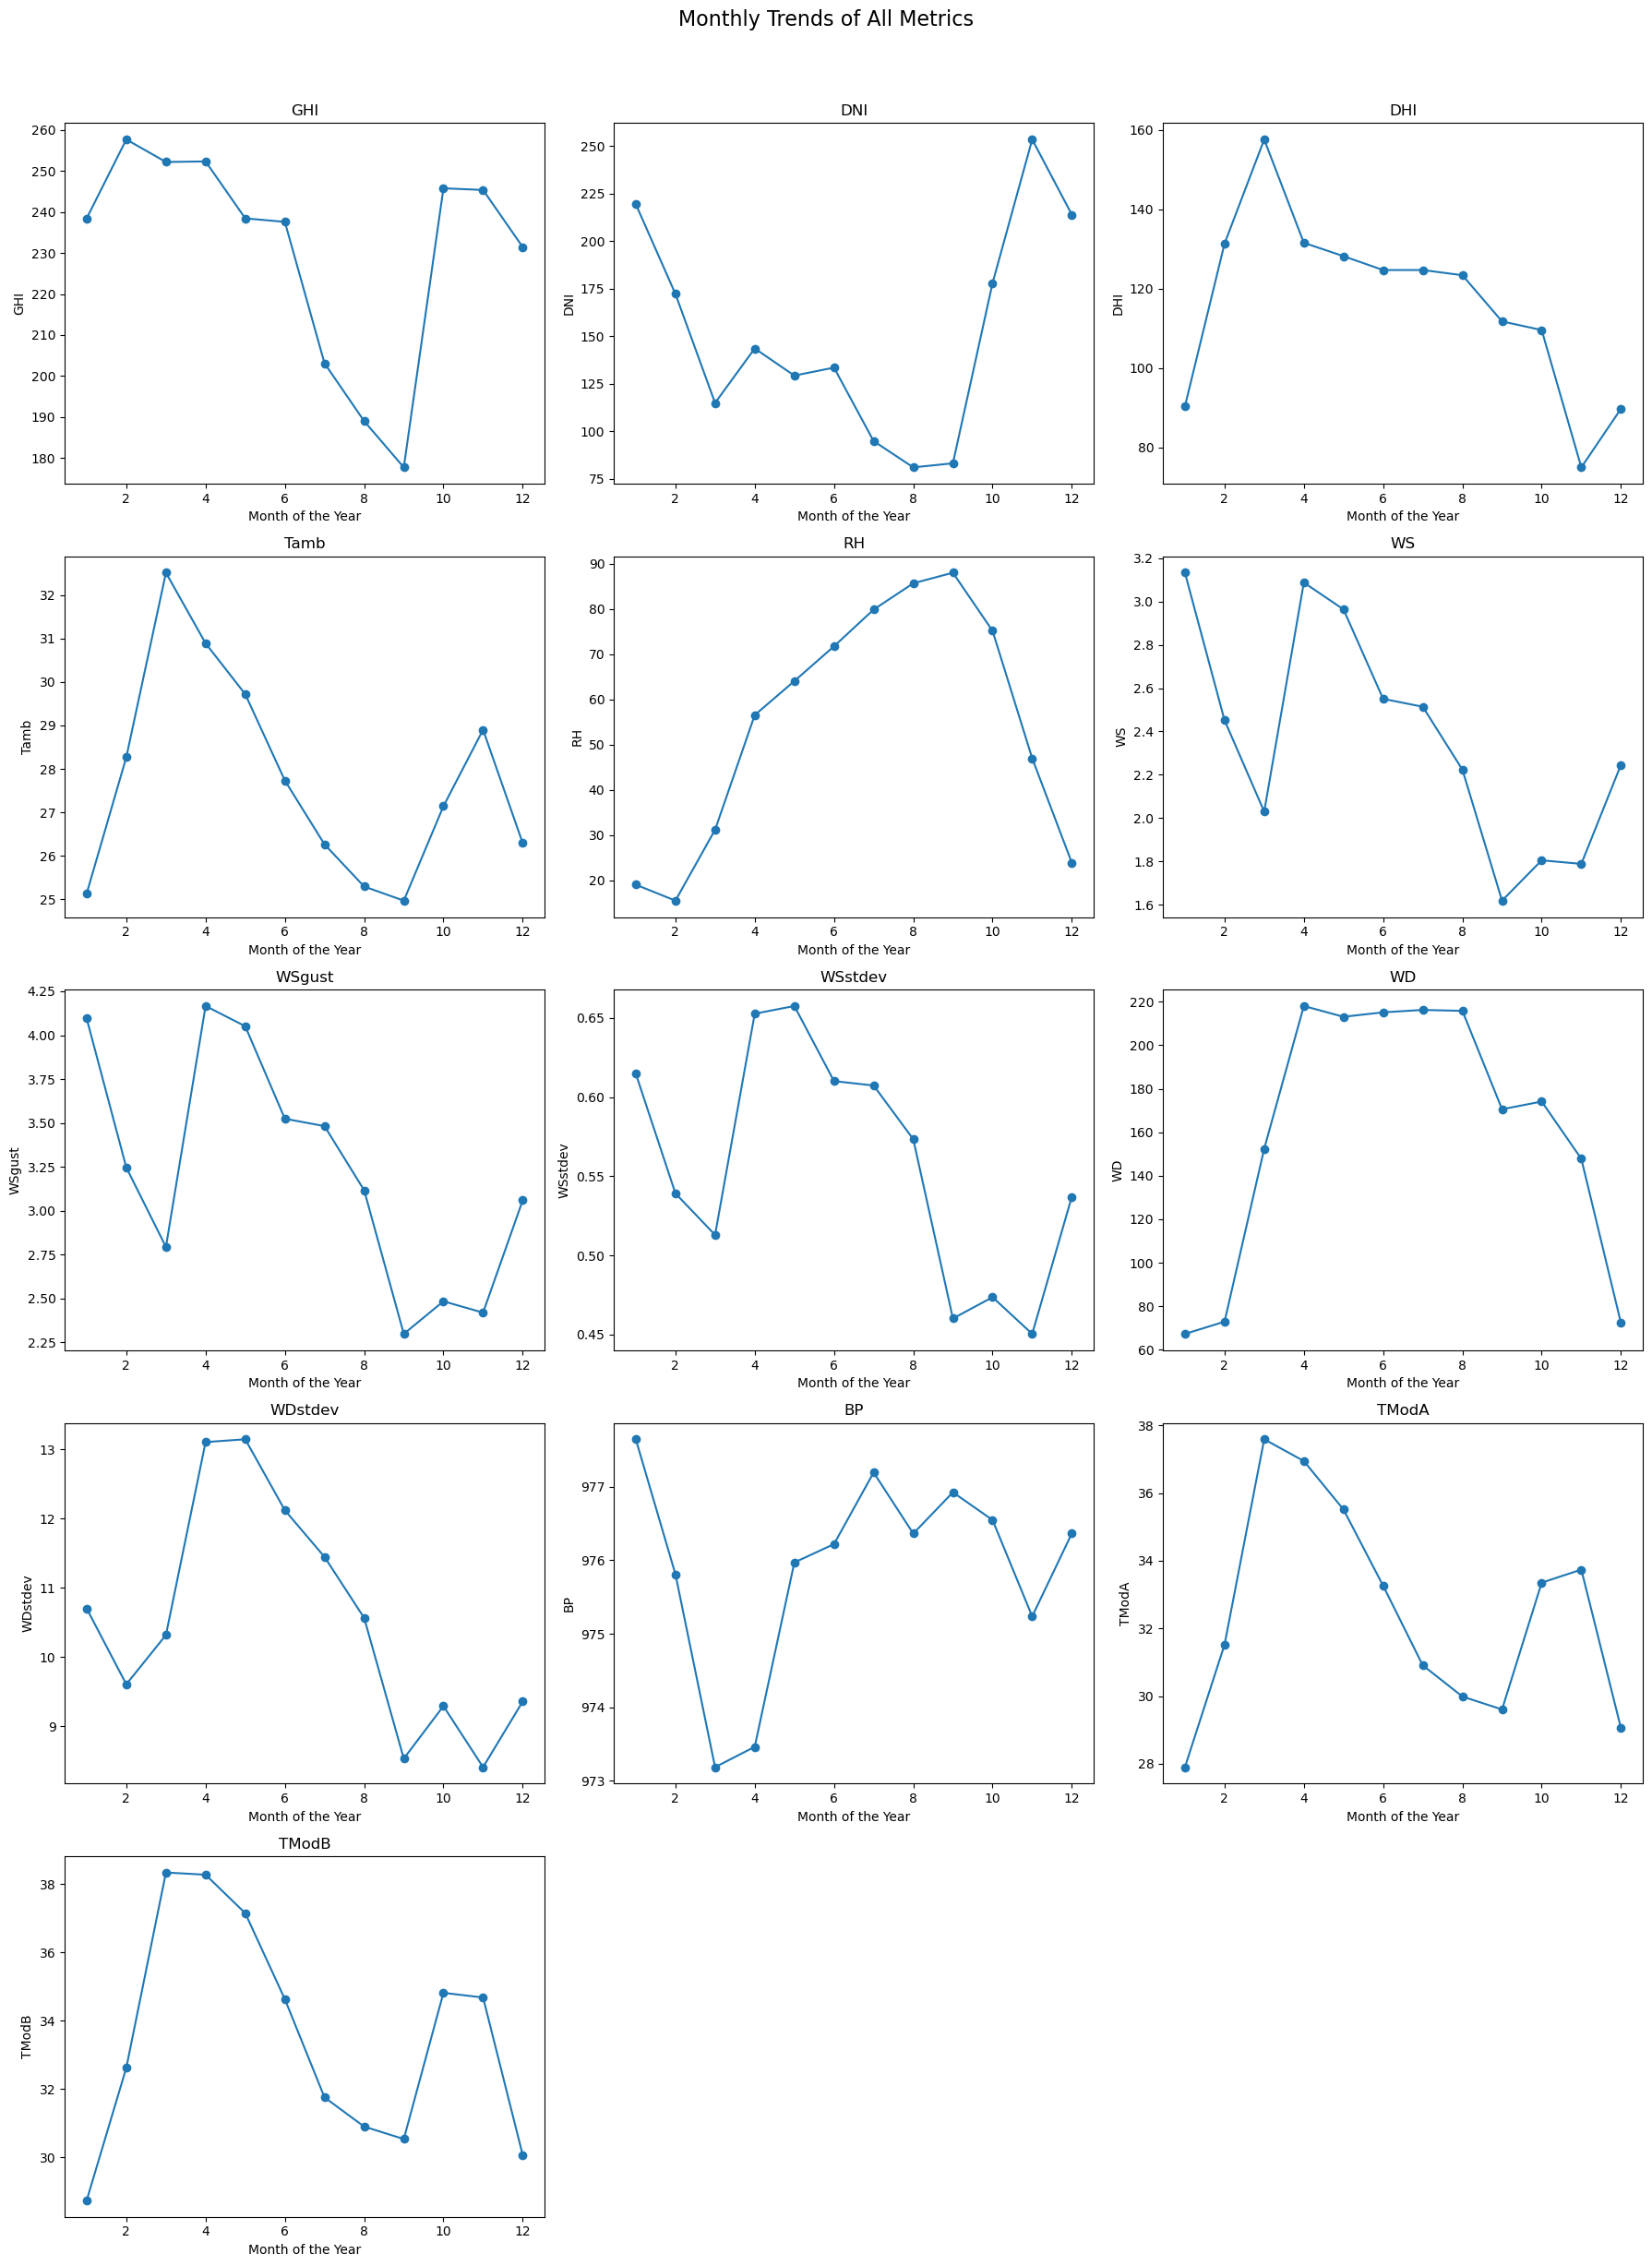

In [48]:
# Ensure the 'Timestamp' column is a datetime object
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])

# Set the 'Timestamp' column as the index if it's not already
togo_df.set_index('Timestamp', inplace=True)

# Extract the month from the Timestamp index
togo_df['Month'] = togo_df.index.month

# Group data by 'Month' and calculate the mean
monthly_data = togo_df.groupby('Month').mean()

# Define columns to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB']

# Determine grid size for subplots
total_columns = len(columns_to_plot)
cols = 3  # Number of columns per row in the plot
rows = math.ceil(total_columns / cols)  # Calculate required rows

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
fig.suptitle('Monthly Trends of All Metrics', fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through the columns and create individual plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(monthly_data.index, monthly_data[column], marker='o')
    ax.set_title(column)
    ax.set_xlabel('Month of the Year')
    ax.set_ylabel(column)

# Hide any unused subplots (if total columns < grid size)
for j in range(total_columns, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

from the above plot we can see different seasonal variations for eg 
  
  
  The DHI (Diffuse Horizontal Irradiance) shows a continuous increase from its lowest reading in January, during the heart of the dry season in Benin, to its highest point in March, as the region transitions into the wet season. This increase is associated with cloud coverage. After reaching its peak in March, DHI gradually decreases from April to December, with some fluctuations in its decline.

On the other hand, DNI (Direct Normal Irradiance) continuously decreases from January to March, during the dry season in Benin, as the region shifts into the transition phase leading to the wet season. From April, DNI starts to increase slightly until it reaches a low point in August, at the peak of the wet season. After this, it gradually increases again towards its peak, completing the seasonal cycle. The decrease in DNI is linked to cloud cover during the wet season.

## Multivariate Analysis


### 1. Correlation Matrix for Solar Radiation and Temperature


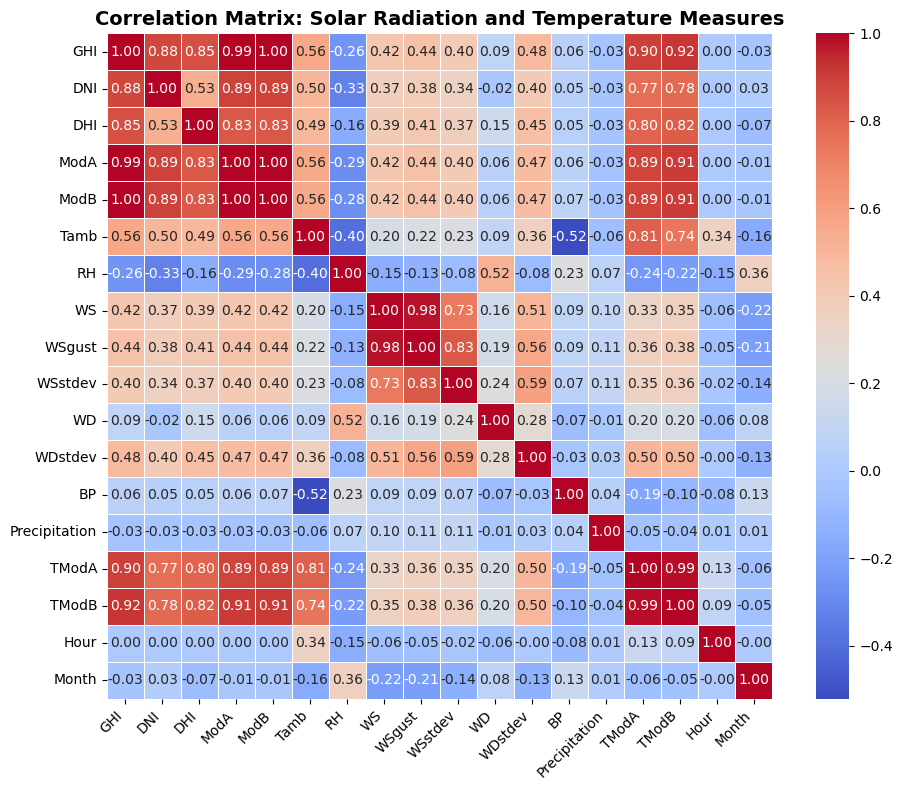

In [52]:
# Correlation matrix for solar radiation and temperature measures
corr_matrix = togo_df[numeric_col].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(
    corr_matrix,
    annot=True,               # Show annotations
    annot_kws={"size": 10},   # Adjust annotation font size
    cmap='coolwarm',          # Set colormap
    fmt='.2f',                # Format annotation to 2 decimal places
    cbar=True,                # Display color bar
    linewidths=0.5,           # Add gridlines between cells
    square=True               # Keep cells square
)
plt.title('Correlation Matrix: Solar Radiation and Temperature Measures', fontsize=14, weight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust y-axis label size
plt.tight_layout()       # Automatically adjust spacing
plt.show()


#### Based on the heatmap analysis, we can now identify the correlations that will help us make informed decisions for our business objective: determining a region with high potential for maximizing solar energy farming with long-term sustainability. Specifically, we need to focus on the positive correlations with ModA and ModB readings, as these represent key indicators of the environmental conditions conducive to solar energy production. By identifying the variables that exhibit strong positive correlations with ModA and ModB, we can pinpoint the factors that are most likely to drive efficient and sustainable solar energy generation in the region. 
### Here are the columns/features that have postivie correlation with ModA and ModB:
       DHI (0.83 with ModA & 0.83 with ModB )
       DNI (0.89 with ModA & 0.89 with ModB)
       GHI (0.99 with ModA & 1 with ModB)
